In [6]:
import networkx as nx
import json

fj_network = 'fj_network.json'
fp_network = 'fp_network.json'
ws_network = 'ws_network.json'

def city_node(json_path, title):
    with open(json_path, 'r') as file:
        df = json.load(file)

    locations = df['n']
    links = df['Connectivity Matrix W']
    ports = df['ports_according_communities']

    location_map = {}
    for location, port_list in ports.items():
        for port in port_list:
            location_map[port.strip()] = location

    G = nx.Graph()

    for location, population in locations.items():
        G.add_node(location, size=population, label=f"{location}")

    for connection, volume in links.items():
        loc1, loc2 = [location_map[port.strip()] for port in connection.split(',')]
        G.add_edge(loc1, loc2, weight=volume)
    
    # Calculate node degrees
    degrees = {node: degree for node, degree in G.degree()}
    print(f"{title} Node Degrees:")
    for node, degree in degrees.items():
        print(f"{node}: {degree}")

In [8]:
# Calculate and print node degrees for each network
city_node(fj_network, 'Fiji')

Fiji Node Degrees:
Nadi: 12
Sawakasa: 1
Vuda(Lautoka): 3
Malolo(Tropica/Malolo/Likuliku/Castaway): 3
Vuda(Bounty Island): 4
Suva: 10
Naviti(Paradise/MantaRay/Barefoot): 3
Malolo(Tokoriki Island): 3
Malolo(Tadrai/Mana): 4
Vuda(Treasure/Beachconber): 6
Yasawa: 3
Malolo(Matamanoa Island): 3
Naviti: 3
Bua/Macuata/Cakaudrove: 4
Kadavu: 1
Serua: 5
Tavuki: 2
Moala: 1
Lakeba: 1
Cicia: 1
Lomaloma/Mualevu: 1
Ovalau: 1
LomaivitiOtherIslands: 1
Koro: 1
Wainikeli: 3


In [9]:
city_node(fp_network, 'French Polynesia')

French Polynesia Node Degrees:
Ahe: 1
Arutua: 1
Bora Bora: 9
Fakarava: 4
Gambier: 1
Hao: 1
Hiva Oa: 3
Huahine: 4
Makemo: 1
Manihi: 1
Mataiva: 2
Maupiti: 3
Moorea: 4
Nuku Hiva: 4
Raiatea: 8
Raivavae: 2
Rangiroa: 6
Rimatara: 2
Rurutu: 3
Taha'a: 2
Tahiti: 23
Tikehau: 5
Tubuai: 3
Ua Huka: 3
Ua Pou: 4


In [10]:
city_node(ws_network, 'Samoa')

Samoa Node Degrees:
Faasaleleaga: 3
Gagaemauga: 2
Gagaifoumauga: 2
Vaisigano: 2
Falealupo: 2
Alataua i Sisifo: 2
Salega: 2
Palauli & Satupaitea: 2
Vaimauga: 2
Faleata: 2
Sagaga: 2
Aana Alofi: 2
Aiga i le Tai: 3
Falelatai & Samatau: 2
Lefaga & Faleaseela: 2
Safata: 2
Siumu: 2
Falealili: 2
Lotofaga: 2
Lepa: 2
Aleipata Itupa i Luga: 2
Aleipata Itupa i Lalo: 2
Vaa o Fonoti: 2
Anoamaa: 2


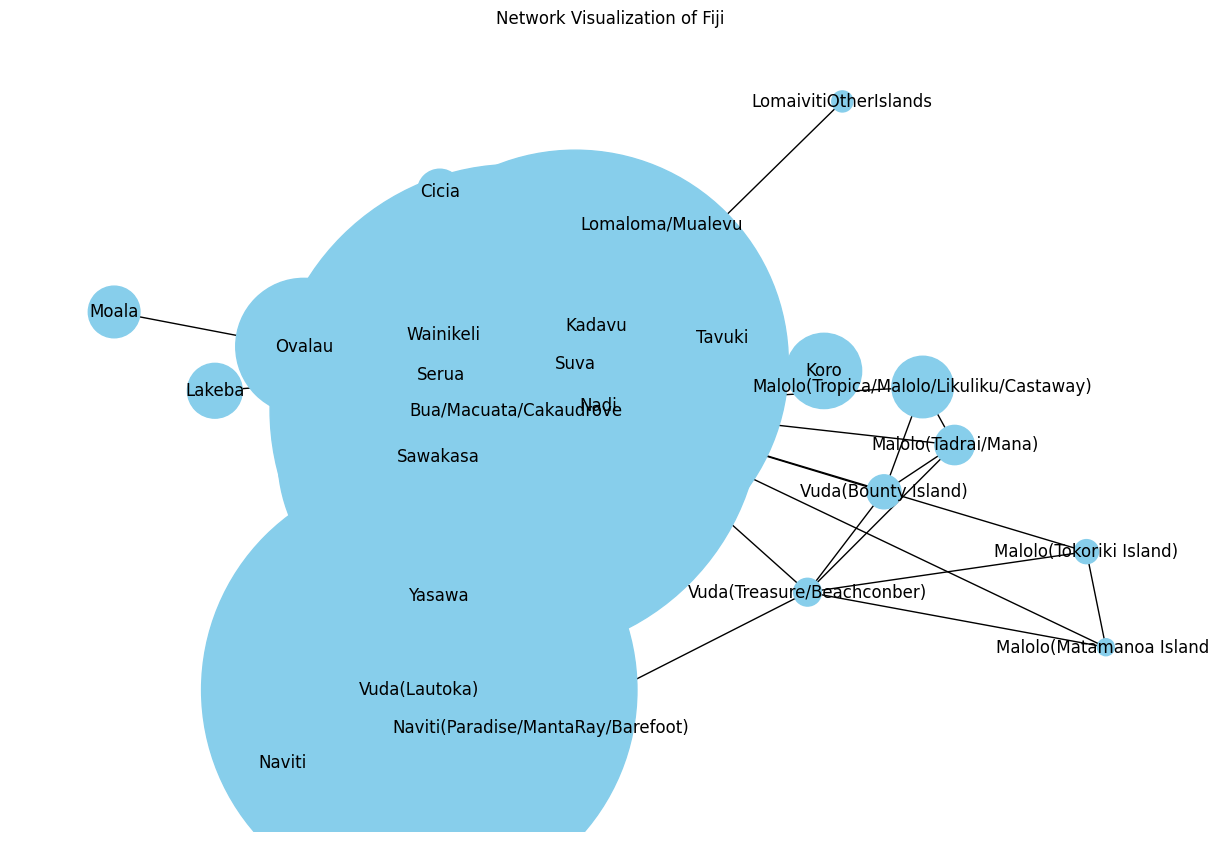

In [11]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_network(json_path, title):
    with open(json_path, 'r') as file:
        df = json.load(file)

    locations = df['n']
    links = df['Connectivity Matrix W']
    ports = df['ports_according_communities']

    location_map = {}
    for location, port_list in ports.items():
        for port in port_list:
            location_map[port.strip()] = location

    G = nx.Graph()

    for location, population in locations.items():
        G.add_node(location, size=population, label=f"{location}")

    for connection, volume in links.items():
        loc1, loc2 = [location_map[port.strip()] for port in connection.split(',')]
        G.add_edge(loc1, loc2, weight=volume)

    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=[G.nodes[node]['size'] for node in G], node_color='skyblue')
    plt.title(title)
    plt.show()

# Example
visualize_network('fj_network.json', 'Network Visualization of Fiji')

In [12]:
import numpy as np

def descriptive_statistics(degree_data, title):
    degrees = list(degree_data.values())
    mean_degree = np.mean(degrees)
    median_degree = np.median(degrees)
    std_degree = np.std(degrees)

    print(f"{title} - Descriptive Statistics:")
    print(f"Mean Degree: {mean_degree}")
    print(f"Median Degree: {median_degree}")
    print(f"Standard Deviation: {std_degree}")

# Example data
descriptive_statistics(fiji_degrees, 'Node Degrees in Fiji')

NameError: name 'fiji_degrees' is not defined

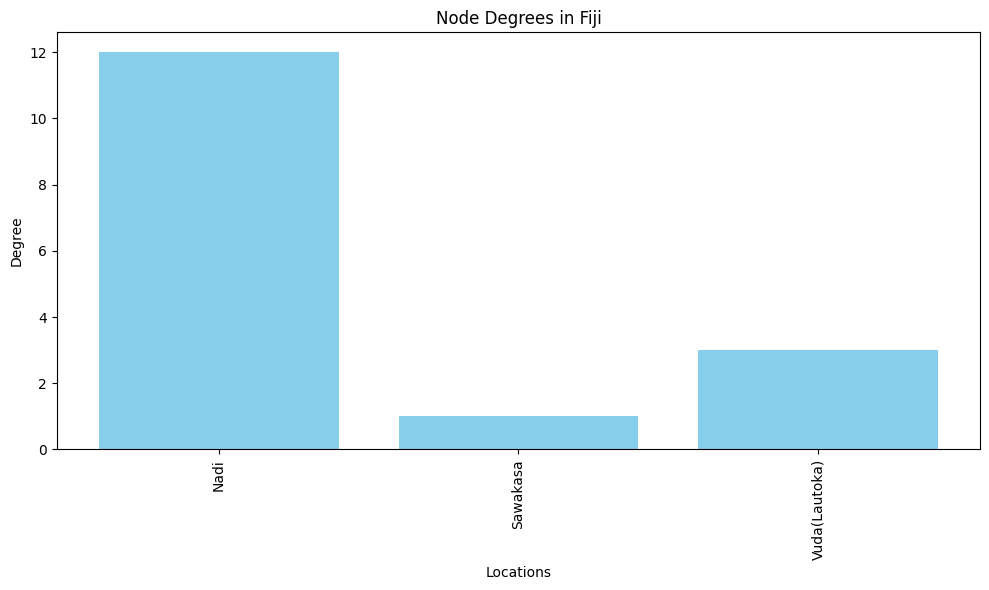

In [13]:
import matplotlib.pyplot as plt

def plot_degrees(degree_data, title):
    locations = list(degree_data.keys())
    degrees = list(degree_data.values())

    plt.figure(figsize=(10, 6))
    plt.bar(locations, degrees, color='skyblue')
    plt.xlabel('Locations')
    plt.ylabel('Degree')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Example data
fiji_degrees = {
    "Nadi": 12, "Sawakasa": 1, "Vuda(Lautoka)": 3, # ... other locations
}
plot_degrees(fiji_degrees, 'Node Degrees in Fiji')

In [14]:
import json
import pandas as pd
import networkx as nx
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Function to load network data and calculate degrees and population
def load_network_data(json_path):
    with open(json_path, 'r') as file:
        df = json.load(file)

    locations = df['n']
    links = df['Connectivity Matrix W']
    ports = df['ports_according_communities']

    location_map = {}
    for location, port_list in ports.items():
        for port in port_list:
            location_map[port.strip()] = location

    G = nx.Graph()
    for location, population in locations.items():
        G.add_node(location, population=population)

    for connection, volume in links.items():
        loc1, loc2 = [location_map[port.strip()] for port in connection.split(',')]
        G.add_edge(loc1, loc2, weight=volume)

    degrees = dict(G.degree())
    population = nx.get_node_attributes(G, 'population')
    return degrees, population

# Load data for each country
fj_degrees, fj_population = load_network_data('fj_network.json')
fp_degrees, fp_population = load_network_data('fp_network.json')
ws_degrees, ws_population = load_network_data('ws_network.json')

# Combine data into a single DataFrame for plotting
data = []
for location, degree in fj_degrees.items():
    data.append(('Fiji', location, degree, fj_population[location]))
for location, degree in fp_degrees.items():
    data.append(('French Polynesia', location, degree, fp_population[location]))
for location, degree in ws_degrees.items():
    data.append(('Samoa', location, degree, ws_population[location]))

df = pd.DataFrame(data, columns=['Country', 'Location', 'Degree', 'Population'])

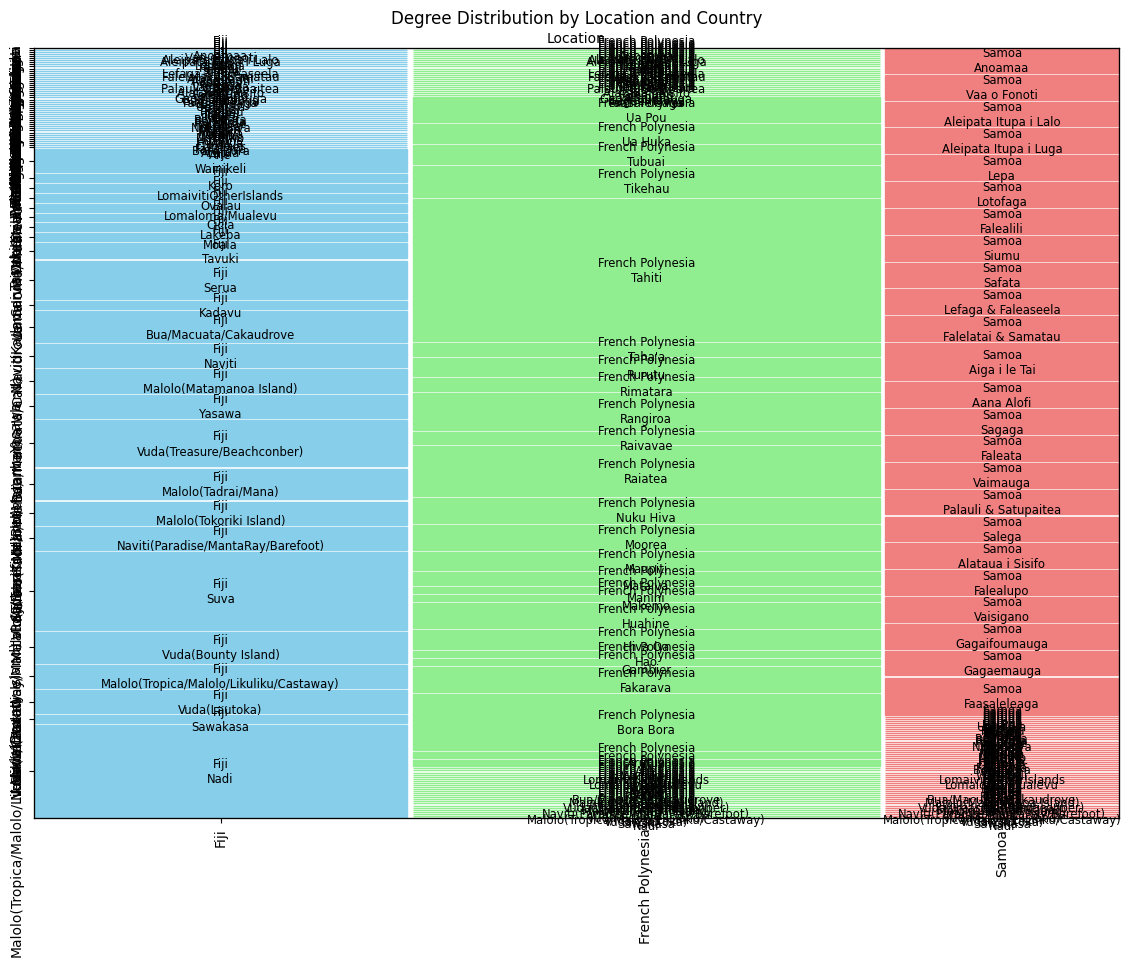

In [15]:
# Function to generate mosaic plot
def create_mosaic_plot(df):
    props = lambda key: {'color': 'skyblue'} if 'Fiji' in key else {'color': 'lightgreen'} if 'French Polynesia' in key else {'color': 'lightcoral'}
    mosaic_data = df.set_index(['Country', 'Location']).to_dict(orient='index')
    mosaic_data = {(k1, k2): v['Degree'] for (k1, k2), v in mosaic_data.items()}

    plt.figure(figsize=(14, 10))
    mosaic(mosaic_data, properties=props, title='Degree Distribution by Location and Country', label_rotation=90, ax=plt.gca())
    plt.xlabel('Location')
    plt.ylabel('Degree')
    plt.show()

# Create mosaic plot
create_mosaic_plot(df)

In [16]:
import altair as alt
from vega_datasets import data

source = data.cars()

base = (
    alt.Chart(source)
    .transform_aggregate(count_="count()", groupby=["Origin", "Cylinders"])
    .transform_stack(
        stack="count_",
        as_=["stack_count_Origin1", "stack_count_Origin2"],
        offset="normalize",
        sort=[alt.SortField("Origin", "ascending")],
        groupby=[],
    )
    .transform_window(
        x="min(stack_count_Origin1)",
        x2="max(stack_count_Origin2)",
        rank_Cylinders="dense_rank()",
        distinct_Cylinders="distinct(Cylinders)",
        groupby=["Origin"],
        frame=[None, None],
        sort=[alt.SortField("Cylinders", "ascending")],
    )
    .transform_window(
        rank_Origin="dense_rank()",
        frame=[None, None],
        sort=[alt.SortField("Origin", "ascending")],
    )
    .transform_stack(
        stack="count_",
        groupby=["Origin"],
        as_=["y", "y2"],
        offset="normalize",
        sort=[alt.SortField("Cylinders", "ascending")],
    )
    .transform_calculate(
        ny="datum.y + (datum.rank_Cylinders - 1) * datum.distinct_Cylinders * 0.01 / 3",
        ny2="datum.y2 + (datum.rank_Cylinders - 1) * datum.distinct_Cylinders * 0.01 / 3",
        nx="datum.x + (datum.rank_Origin - 1) * 0.01",
        nx2="datum.x2 + (datum.rank_Origin - 1) * 0.01",
        xc="(datum.nx+datum.nx2)/2",
        yc="(datum.ny+datum.ny2)/2",
    )
)


rect = base.mark_rect().encode(
    x=alt.X("nx:Q").axis(None),
    x2="nx2",
    y="ny:Q",
    y2="ny2",
    color=alt.Color("Origin:N").legend(None),
    opacity=alt.Opacity("Cylinders:Q").legend(None),
    tooltip=["Origin:N", "Cylinders:Q"],
)


text = base.mark_text(baseline="middle").encode(
    alt.X("xc:Q").axis(None),
    alt.Y("yc:Q").title("Cylinders"),
    text="Cylinders:N"
)

mosaic = rect + text

origin_labels = base.mark_text(baseline="middle", align="center").encode(
    alt.X("min(xc):Q").title("Origin").axis(orient="top"),
    alt.Color("Origin").legend(None),
    text="Origin",
)

(
    (origin_labels & mosaic)
    .resolve_scale(x="shared")
    .configure_view(stroke="")
    .configure_concat(spacing=10)
    .configure_axis(domain=False, ticks=False, labels=False, grid=False)
)

alt.VConcatChart(...)

In [17]:
source = data.cars()

In [18]:
source.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
